<a href="https://colab.research.google.com/github/lawsonk16/Remote-Sensing-Datasets/blob/main/DOTA/DOTA_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 - Code Imports

 - First, import this notebook and the script in the folder with it
 - Then, also import the coco_utils scripts
 - Add the locations of those files to your system path

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/scripts/')

from coco_data.dota_coco import *
from coco_utils.coco_classification import *
from coco_utils.coco_help import *

import os
import shutil
from matplotlib import pyplot as plt
from matplotlib import patches
from tqdm import tqdm
import json

 # Step 2 - Data Import and Unpacking
  -  go to https://captain-whu.github.io/DOTA/dataset.html
  - use their links to download some data
    - note that this code was made to work with v1.0-1.5 so you will have to do a little extra work to use 2.0
  - point to wherever the data is downloaded

In [ ]:
# for colab, move the data locally
data_dir_src = '/content/drive/MyDrive/Colab Notebooks/OTHER/DOTA/'
data_dir = '/content/DOTA/'

shutil.copytree(data_dir_src, data_dir)

'/content/DOTA/'

#### Part A - Labels

 - Note that these paths are all configured for version 1.5, and you will have to slightly rework them for v1.0
 - Also, this script as of now will unpack the image-oriented labels.
 - In order to unpack these labels, you need both sets of labels to get all the pieces of info required by COCO

In [ ]:
# Unpack the labels - note the file paths are slightly different for v1.0
vers = 1.5

# train labels
train_labels_src = f'{data_dir}train/labelTxt-v{vers}/DOTA-v{vers}_train.zip'
train_labels_hbb_src = f'{data_dir}train/labelTxt-v{vers}/DOTA-v{vers}_train_hbb.zip'

train_labels = f'{data_dir}train/labels-v{vers}/'
train_labels_hbb = f'{data_dir}train/labels-v{vers}_hbb/'

shutil.unpack_archive(train_labels_src, train_labels)
shutil.unpack_archive(train_labels_hbb_src, train_labels_hbb)

# val labels
val_labels_src = f'{data_dir}val/labelTxt-v{vers}/DOTA-v{vers}_val.zip'
val_labels_hbb_src = f'{data_dir}val/labelTxt-v{vers}/DOTA-v{vers}_val_hbb.zip'

val_labels = f'{data_dir}val/labels-v{vers}/'
val_labels_hbb = f'{data_dir}val/labels-v{vers}_hbb/'

shutil.unpack_archive(val_labels_src, val_labels)
shutil.unpack_archive(val_labels_hbb_src, val_labels_hbb)

# remove dirs with zips when you're done
shutil.rmtree(f'{data_dir}train/labelTxt-v{vers}/')
shutil.rmtree(f'{data_dir}val/labelTxt-v{vers}/')

#### Part B - The Images
 - The images for v1.0 and v1.5 are the same
 - To add in things for v2.0 would take a little extra formatting 

In [ ]:
train_images = f'{data_dir}train/images/'
val_images = f'{data_dir}val/images/'

train_images_zips = [f'{train_images}part1.zip', f'{train_images}part2.zip', f'{train_images}part3.zip']

# unzip the images and remove unnecessary folders
for f in train_images_zips:
    shutil.unpack_archive(f, f'{data_dir}train/')
    os.remove(f)

shutil.rmtree(f'{data_dir}train/images/1')

shutil.unpack_archive(f'{val_images}/part1.zip', f'{data_dir}val/')
os.remove(f'{val_images}/part1.zip')

#### Part C - Sanity Check

In [ ]:
# check if the number of train labels and images all match
len(os.listdir(train_labels_hbb))==len(os.listdir(train_labels))==len(os.listdir(train_images))

True

In [ ]:
# check if the number of val labels and images all match
len(os.listdir(val_labels_hbb))==len(os.listdir(val_labels))==len(os.listdir(val_images))

True

# Step 3 - Conversion Time!
 - Convert the train data
 - Convert the val data
 - Sanity check the results visually

In [ ]:
train_json = dota_to_coco(train_images, train_labels, train_labels_hbb, version = '1.5')
train_json

100%|██████████| 1411/1411 [00:02<00:00, 473.66it/s]


'/content/DOTA/train/COCO.json'

In [ ]:
val_json = dota_to_coco(val_images, val_labels, val_labels_hbb, version = '1.5')
val_json

100%|██████████| 458/458 [00:00<00:00, 557.68it/s]


'/content/DOTA/val/COCO.json'

<Figure size 432x288 with 0 Axes>

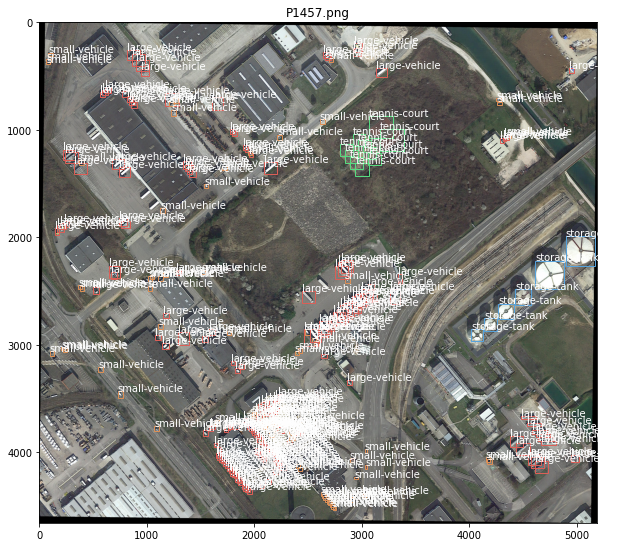

<Figure size 432x288 with 0 Axes>

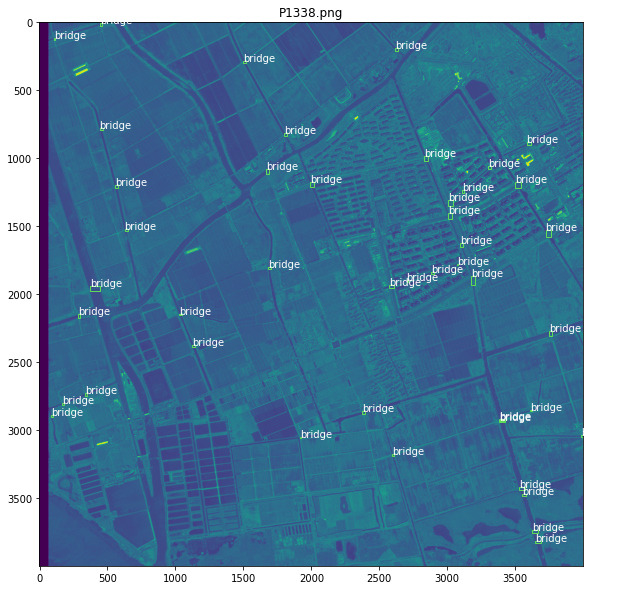

<Figure size 432x288 with 0 Axes>

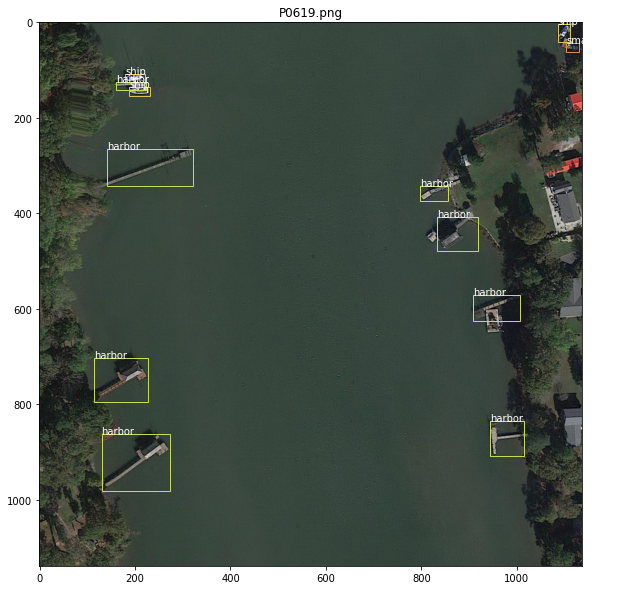

<Figure size 432x288 with 0 Axes>

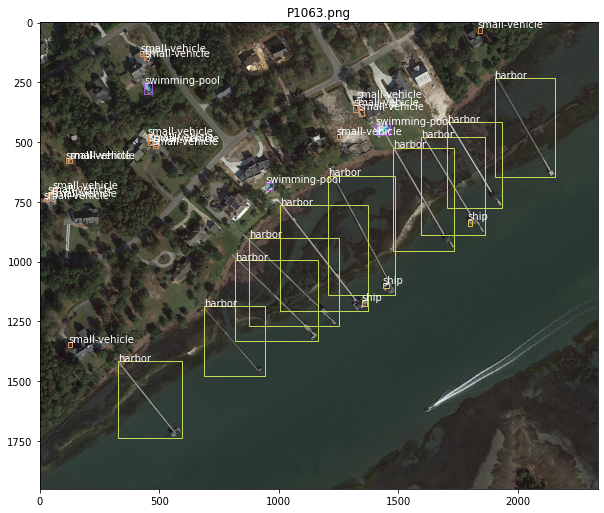

<Figure size 432x288 with 0 Axes>

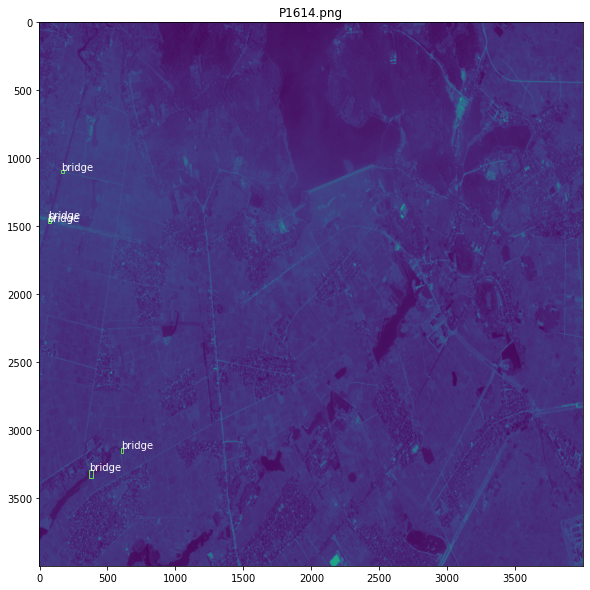

In [ ]:
display_random_ims(5, train_json, train_images, (10,10))

<Figure size 432x288 with 0 Axes>

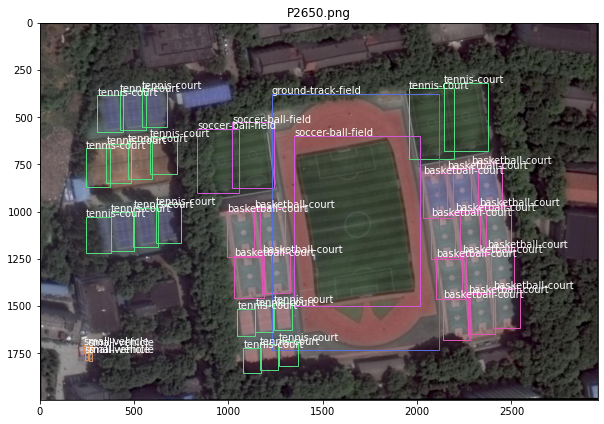

<Figure size 432x288 with 0 Axes>

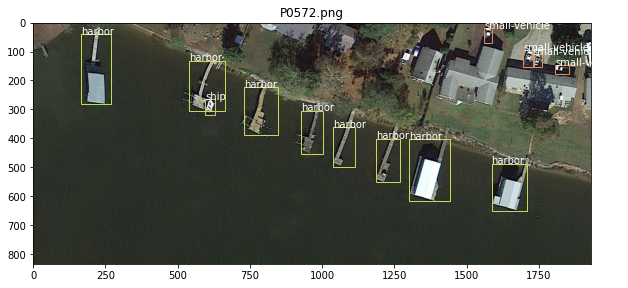

<Figure size 432x288 with 0 Axes>

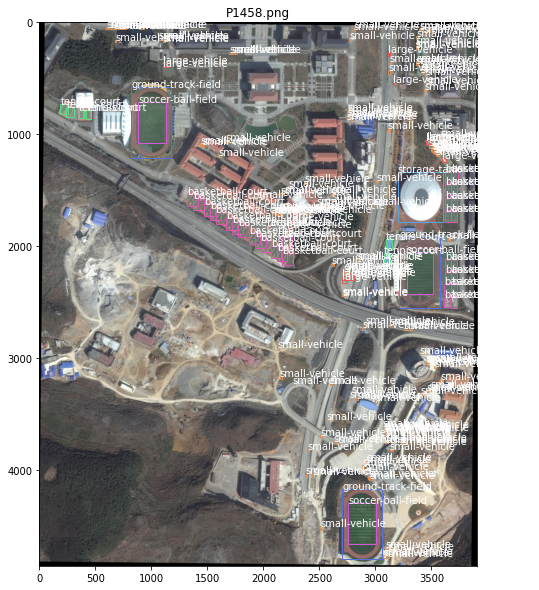

<Figure size 432x288 with 0 Axes>

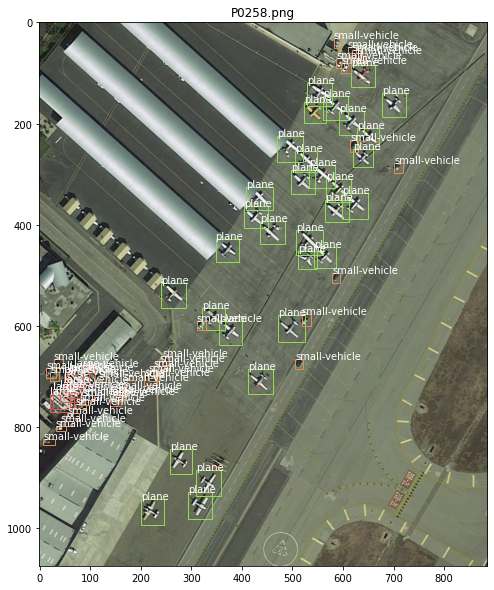

<Figure size 432x288 with 0 Axes>

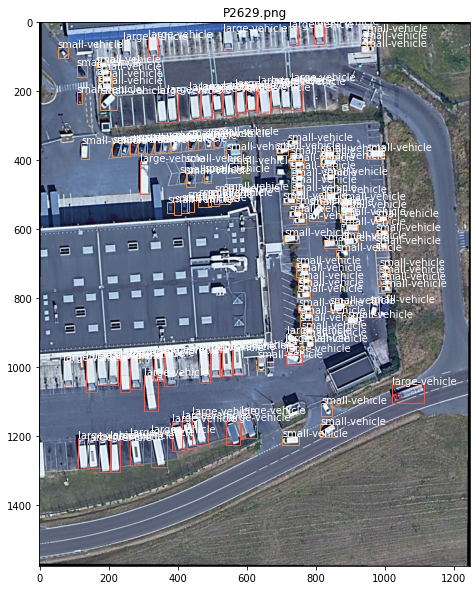

In [ ]:
display_random_ims(5, train_json, train_images, (10,10))

# Step 4 - Use in your projects!
 - You now have a nice, comveniently formatted dataset
 - Go forth, and do science with it